<a href="https://colab.research.google.com/github/deema1999/Parkinston_Disease_Classification_Project/blob/main/Parkinston_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import numpy as np

shape :  (195, 24)
____________________________________
Data columns : 
 Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')
____________________________________
Description : 
        MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...          D2         PPE
count   195.000000    195.000000  ...  195.000000  195.000000
mean    154.228641    197.104918  ...    2.381826    0.206552
std      41.390065     91.491548  ...    0.382799    0.090119
min      88.333000    102.145000  ...    1.423287    0.044539
25%     117.572000    134.862500  ...    2.099125    0.137451
50%     148.790000    175.829000  ...    2.361532    0.194052
75%     182.769000    224.205500  ...    2.636456    0.252980
max     260.105000  

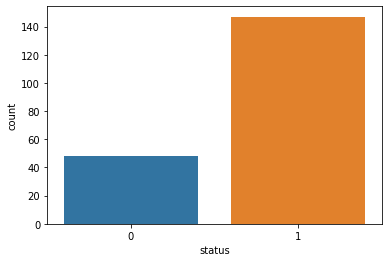

In [ ]:
# Explore data
data = pd.read_csv("/content/parkinsons.data")
print("shape : ", data.shape)
print("____________________________________")
print("Data columns : \n", data.columns)
print("____________________________________")
print("Description : \n", data.describe())
print("____________________________________")
print("is null info : \n", data.isnull())
print("____________________________________")
print(data['status'].unique())
print("All types : ",list(set(data.dtypes.tolist())))
print("____________________________________")
sns.countplot(x="status",data=data)


SUM : 
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


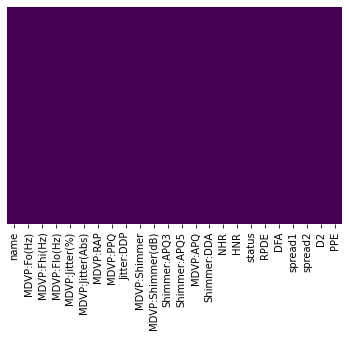

In [ ]:
# To check missing values
print("SUM : \n",data.isnull().sum())
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [ ]:
# to check duplicate values
duplicated_rows = data[data.duplicated()]
print("number of duplicated rows : ", duplicated_rows.shape)

number of duplicated rows :  (0, 24)


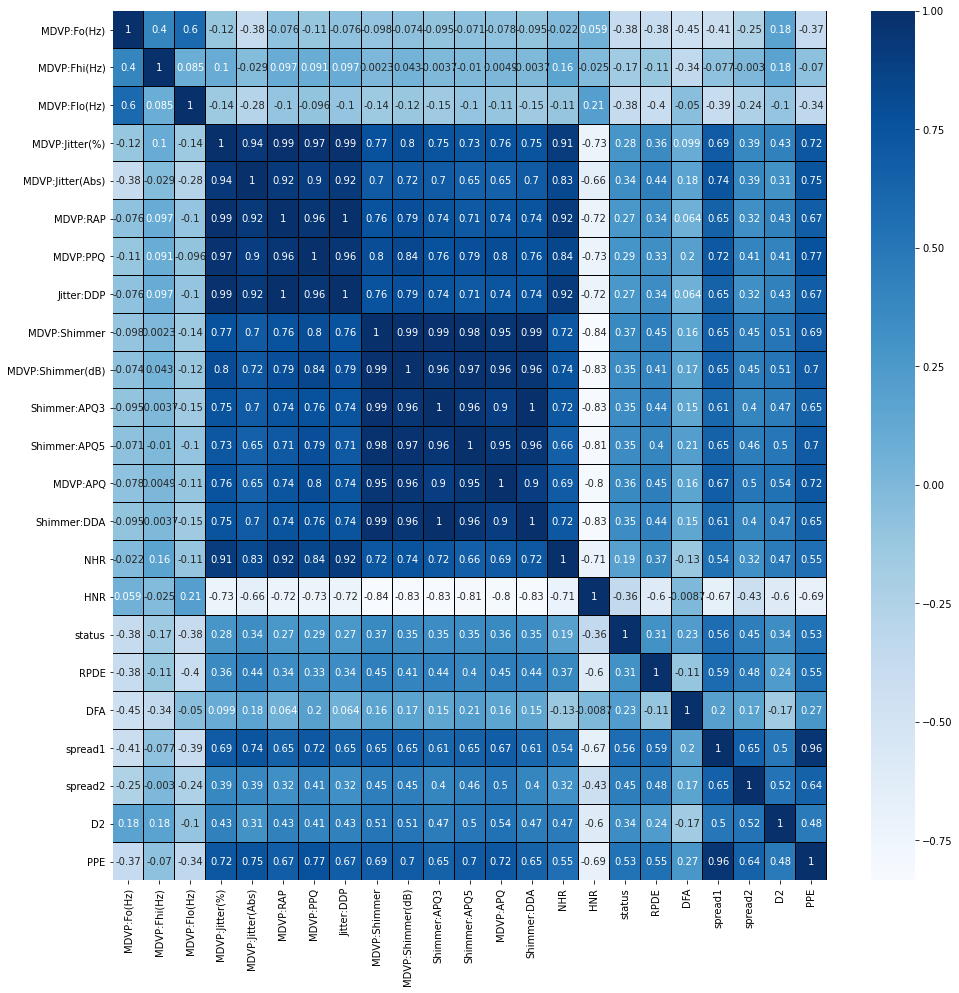

In [ ]:
# corrolation and data visualization
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.01, linecolor='black')

<function matplotlib.pyplot.show>

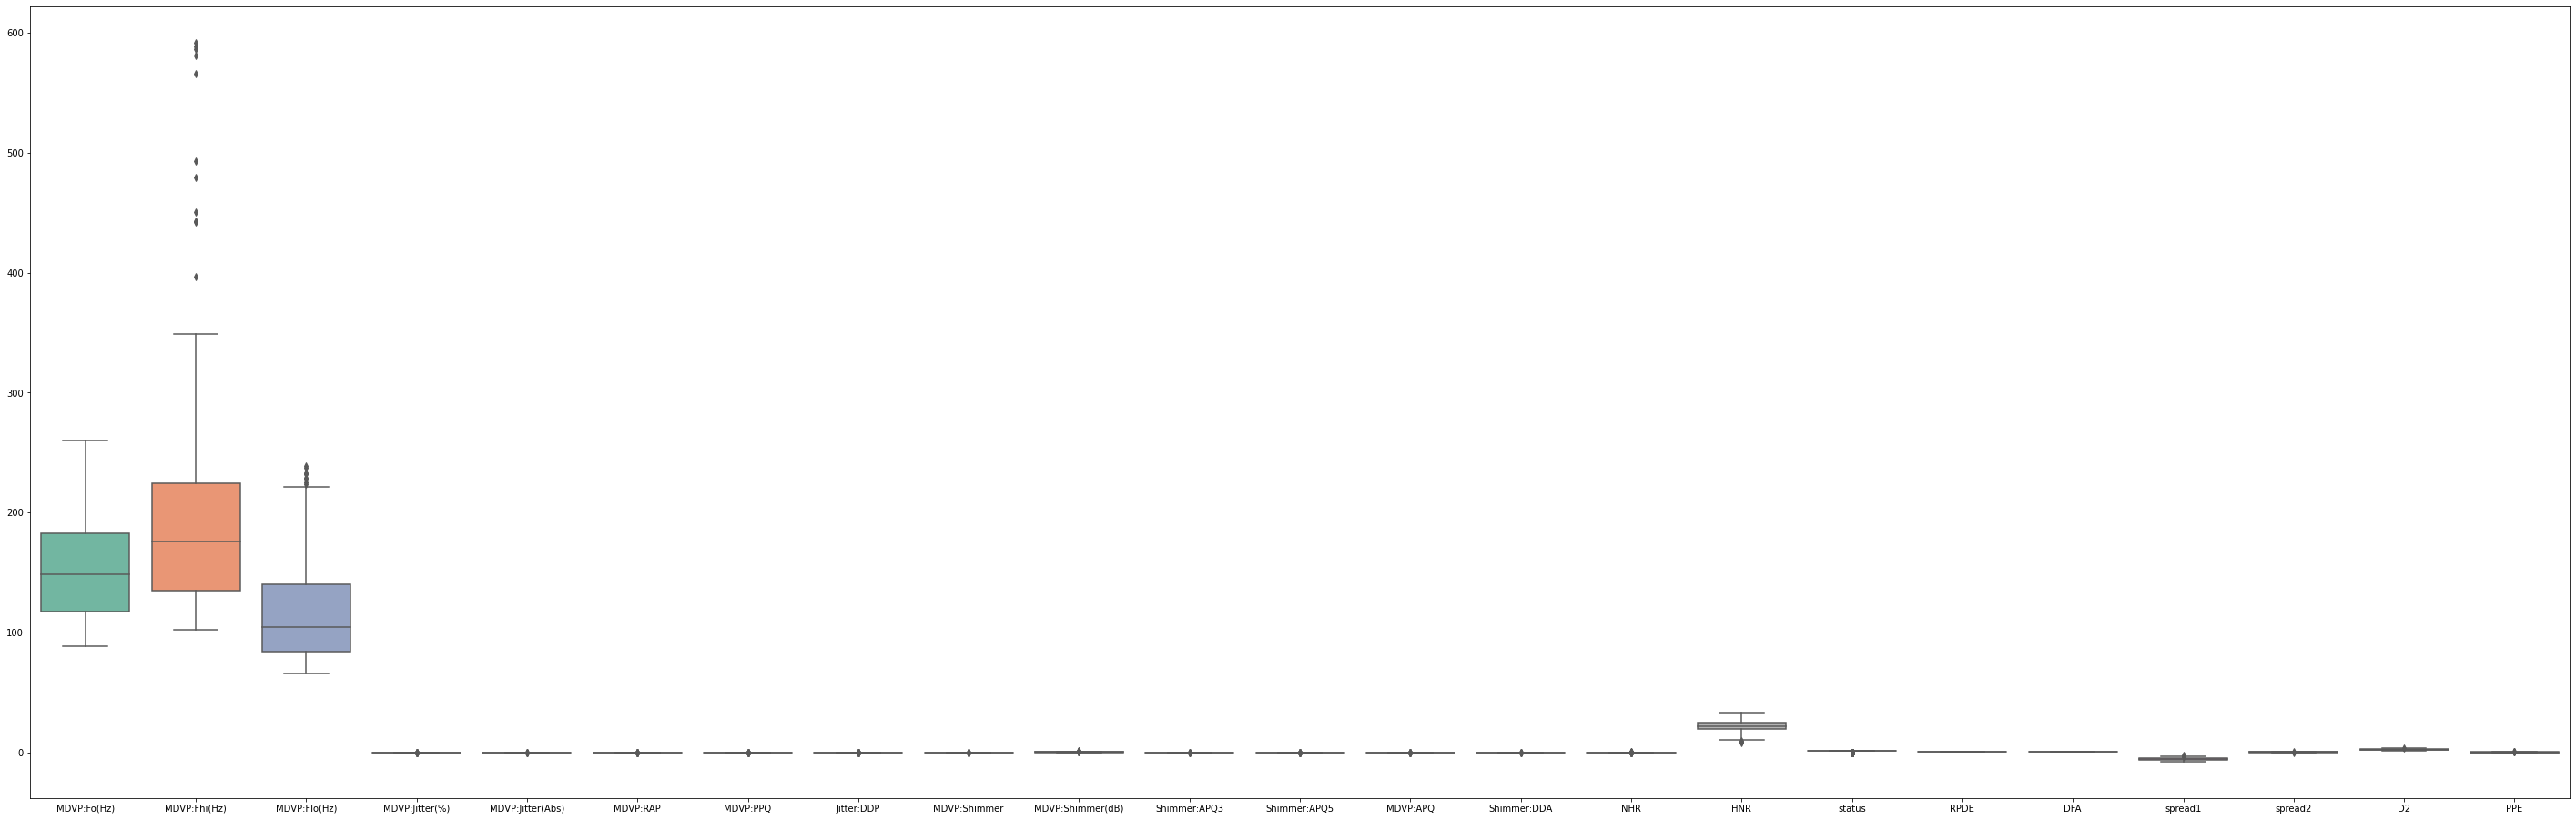

In [ ]:
# Handling Outliers

fig, ax = plt.subplots(figsize=(50,16)) 
sns.boxplot(data=data, orient="v", palette="Set2")
plt.show

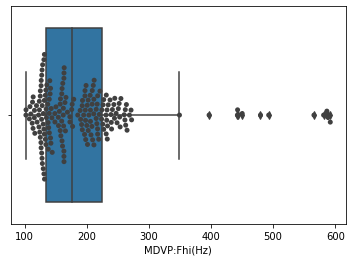

In [ ]:
# One column
sns.boxplot(x=data["MDVP:Fhi(Hz)"], data=data)
sns.swarmplot(x=data["MDVP:Fhi(Hz)"],  data=data, color=".25")

In [ ]:
# Remove Outlier  (When removing outliers the the output classess reduced to 1 class only !)

def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    print("Q1 = ", Q1, " Q3 = ", Q3, " IQR = ", IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Extract all column names as list in Pandas Dataframe
lst_all_cols = data.columns.tolist()
print("lst_all_cols : \n",lst_all_cols)

print("\n")
# Numerical data distribution
print(list(set(data.dtypes.tolist())))
df_num = data.select_dtypes(include = ["float64" , "int64"])
lst_num_cols = df_num.columns.tolist()
print("Numerical Data : \n",lst_num_cols)
print("\n")


data_copy = data.copy()

indx = 0
for col in lst_num_cols:
    print(indx)
    lower_range, upper_range =  remove_outlier(data_copy[col])
    data_copy[col] = np.where(data_copy[col] < lower_range, lower_range, data_copy[col]) 
    data_copy[col] = np.where(data_copy[col] > upper_range, upper_range, data_copy[col])
    indx = indx +1
    print("-----------------------------")



lst_all_cols : 
 ['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


[dtype('int64'), dtype('O'), dtype('float64')]
Numerical Data : 
 ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


0
Q1 =  117.572  Q3 =  182.769  IQR =  65.197
-----------------------------
1
Q1 =  134.8625  Q3 =  224.2055  IQR =  89.34299999999999
-----------------------------
2
Q1 =  84.291  Q3 =  140.01850000000002  IQR =  55.72750000000002
-----------------------------
3
Q1 =  0.00346  Q3 =  0.007365  IQR =  0.003905
--------

array([1.])

<function matplotlib.pyplot.show>

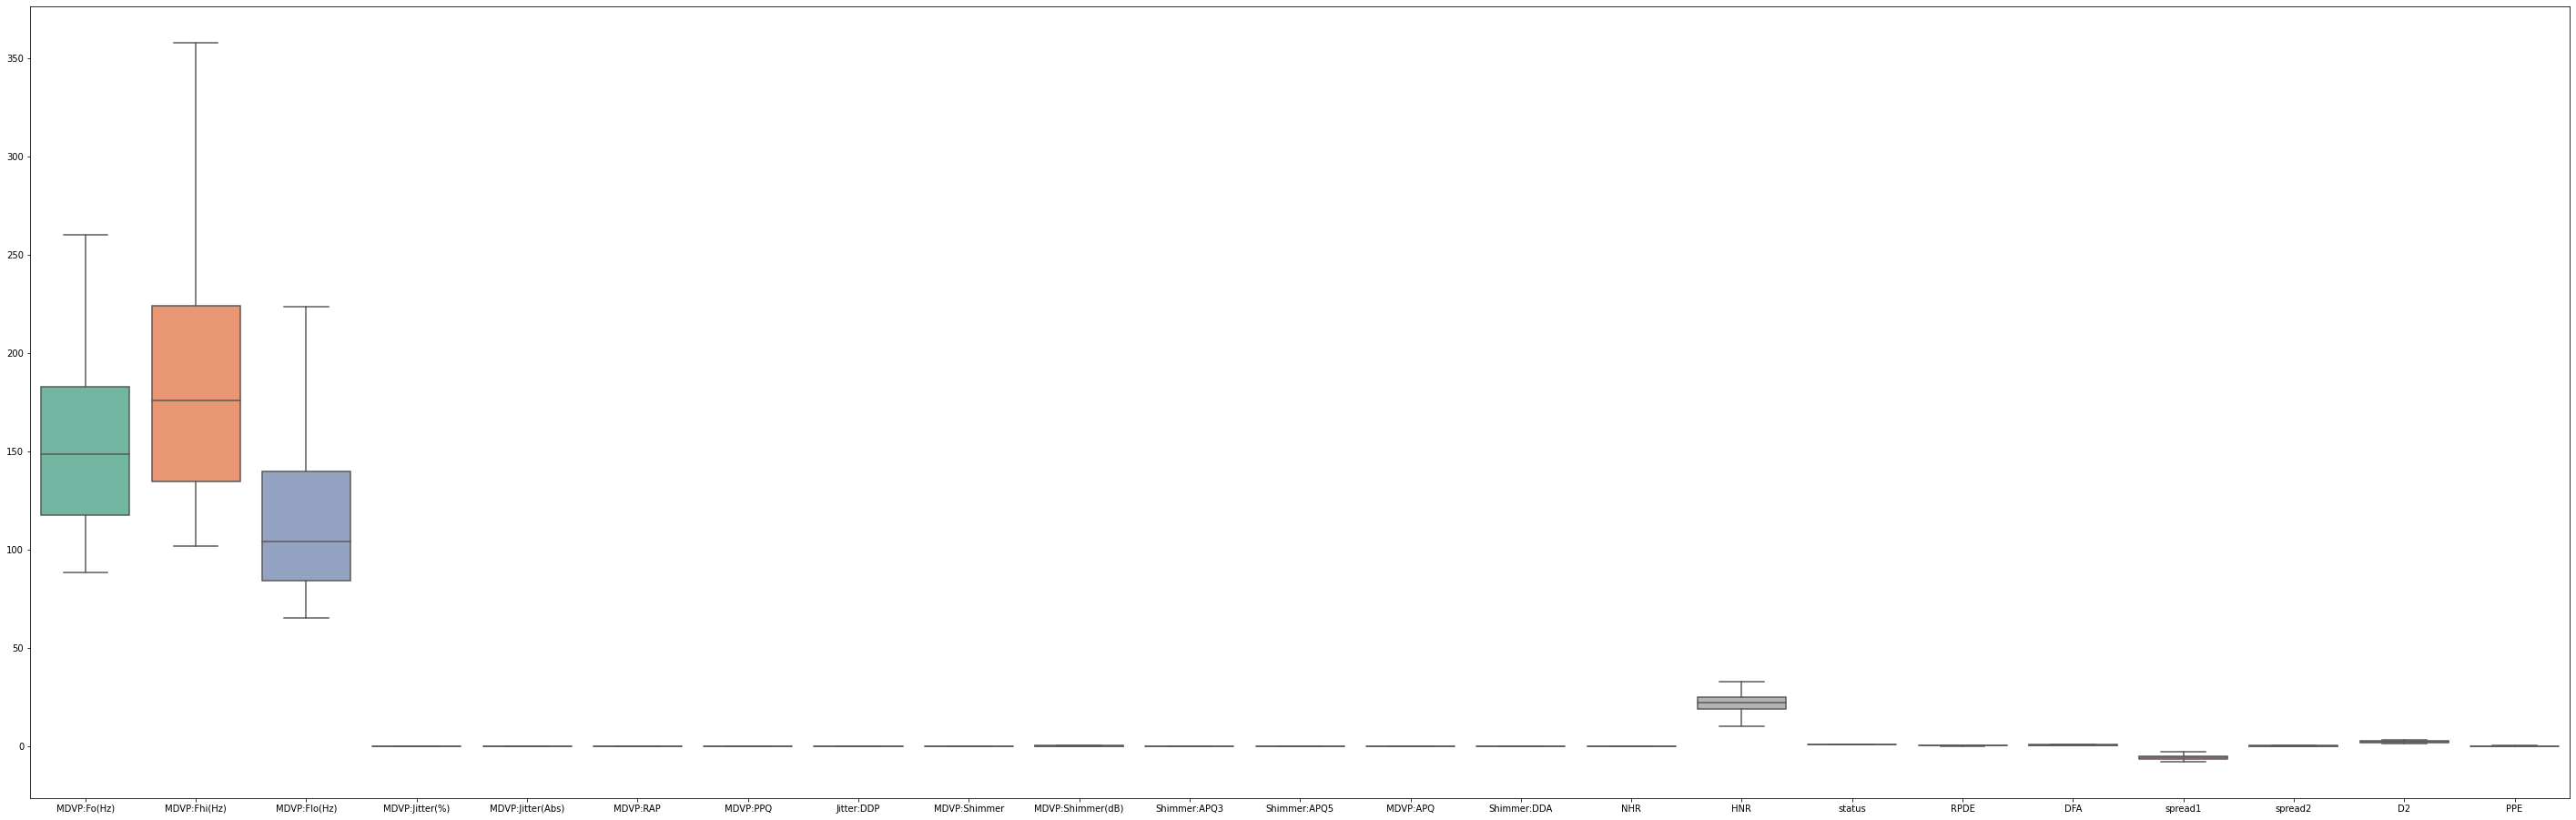

In [ ]:
# Check Outliers

fig, ax = plt.subplots(figsize=(50,16)) 
sns.boxplot(data=data_copy, orient="v", palette="Set2")
plt.show

In [ ]:
data_copy = data.copy()
X = data_copy.drop(["status" , 'name'],axis=1).values
y = data_copy['status'].values



# Split into Input and Output Elements
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=100, stratify=y)

# Standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)
print(data_copy['status'].unique())

X_train =  (156, 22)  y_train =  (156,)
X_test  =  (39, 22)  y_test =  (39,)
[1 0]


Classification report : 
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39

Confusion matrix: 
 [[ 7  3]
 [ 0 29]]


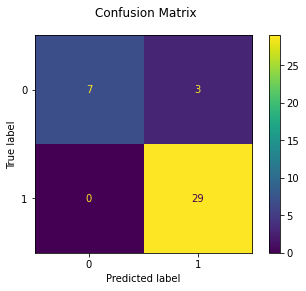

In [ ]:
# svm 

from sklearn import svm , metrics

#svm_classifier = svm.SVC() # 90%
svm_classifier = svm.SVC(kernel="linear") # 92%
#svm_classifier = svm.SVC(kernel="poly", degree=5, C=10, gamma=0.01) #74%
#svm_classifier = svm.SVC(kernel="sigmoid", C=10, gamma=0.001) # 87%
#svm_classifier = svm.SVC(kernel="rbf", C=300, gamma=0.001) # 92%

svm_classifier.fit(X_train, y_train)
predicted = svm_classifier.predict(X_test)


# Classification report
print("-----------------------------------------------------------------------")
# comparing actual response values (y_test) with predicted response values (predicted)
print("Classification report : \n", svm_classifier,"\n", 
      metrics.classification_report(y_test, predicted))

disp = metrics.plot_confusion_matrix(svm_classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

print("Confusion matrix: \n", disp.confusion_matrix)


classification report 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39

confusion matrix : 
 [[ 7  3]
 [ 0 29]]


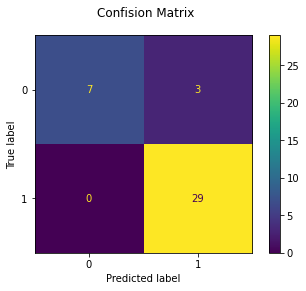

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#log_classifer = LogisticRegression() # 92%
log_classifer = LogisticRegression(random_state=42) # 92%

log_classifer.fit(X_train , y_train)

predicted = log_classifer.predict(X_test)

# Classification Report
print("-----------------------------------------------------------------------")
# comparing actual response values (y_test) with predicted response values (predicted)
print("classification report \n", log_classifer, "\n",
      metrics.classification_report(y_test , predicted))

disp = metrics.plot_confusion_matrix(log_classifer, X_test, y_test)
disp.figure_.suptitle("Confision Matrix")

print("confusion matrix : \n" , disp.confusion_matrix)

classification report : 
 SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) 
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39

Confusion Matrix : 
 [[ 7  3]
 [ 0 29]]


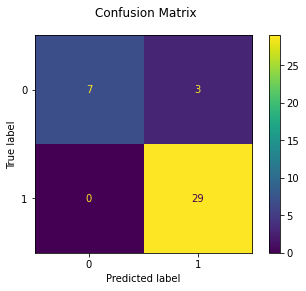

In [ ]:
# SGD 

from sklearn.linear_model import SGDClassifier
from sklearn import metrics

#sgd_classifer = SGDClassifier() # 92%
sgd_classifer = SGDClassifier(loss="log", alpha=0.01, penalty="l2",max_iter=10000, random_state =42) 


sgd_classifer.fit(X_train, y_train)
predicted = sgd_classifer.predict(X_test)

# Classification Report
print("-----------------------------------------------------------------------")
# comparing actual response values (y_test) with predicted response values (predicted)
print("classification report : \n" , sgd_classifer, "\n",
      metrics.classification_report(y_test, predicted))

disp = metrics.plot_confusion_matrix(sgd_classifer, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

print("Confusion Matrix : \n", disp.confusion_matrix)

classification report : 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform') 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39

Confusion Matrix : 
 [[ 8  2]
 [ 2 27]]


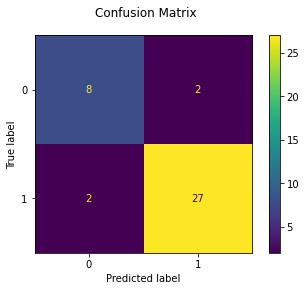

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

knn_classifer = KNeighborsClassifier(n_neighbors = 3) # 90%
knn_classifer.fit(X_train, y_train)

predicted = knn_classifer.predict(X_test)

# Classification Report
print("-----------------------------------------------------------------------")
# comparing actual response values (y_test) with predicted response values (predicted)
print("classification report : \n", knn_classifer, "\n",
      metrics.classification_report(y_test, predicted))

disp = metrics.plot_confusion_matrix(knn_classifer, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

print("Confusion Matrix : \n", disp.confusion_matrix)


Classifier :  GaussianNB(priors=None, var_smoothing=1e-09)
Classification report for classifier : 
               precision    recall  f1-score   support

           0       0.45      1.00      0.62        10
           1       1.00      0.59      0.74        29

    accuracy                           0.69        39
   macro avg       0.73      0.79      0.68        39
weighted avg       0.86      0.69      0.71        39

Confusion matrix: 
 [[10  0]
 [12 17]]


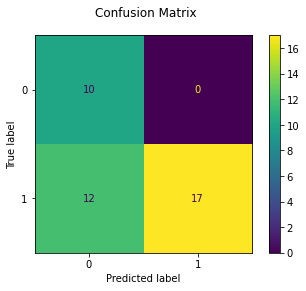

In [ ]:
#NBayes

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Create a Gaussian Classifier
GNB_cls = GaussianNB()

# Train the classifier
GNB_cls.fit(X_train,y_train)

# Predict the value of X_test
predicted = GNB_cls.predict(X_test)

# Classification report
print("-----------------------------------------------------------------------")
# comparing actual response values (y_test) with predicted response values (predicted)
print("Classifier : ", GNB_cls)
print("Classification report for classifier : \n", metrics.classification_report(y_test, predicted))

disp = metrics.plot_confusion_matrix(GNB_cls, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

Classification report : 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.85      1.00      0.92        29

    accuracy                           0.87        39
   macro avg       0.93      0.75      0.79        39
weighted avg       0.89      0.87      0.86        39

Confusion matrix: 
 [[ 5  5]
 [ 0 29]]


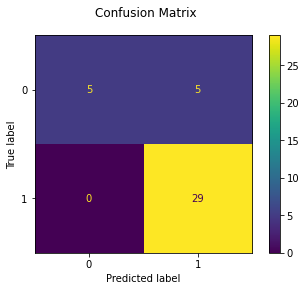

In [ ]:
#Dicision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# training the model on training set
# criterion="gini" splitter="best" 
# max_depth
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X_train, y_train)

# making predictions on the testing set 
predicted = tree_clf.predict(X_test)

print("-----------------------------------------------------------------------")
# comparing actual response values (y_test) with predicted response values (predicted)
from sklearn import metrics 
print("Classification report : \n", tree_clf,"\n", metrics.classification_report(y_test, predicted))
disp = metrics.plot_confusion_matrix(tree_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)


Accuracy: 97.44%
-----------------------------------------------------------------------
Classification report : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=700, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.97      0.98        29

    accuracy                           0.97        39
   macro avg       0.95      0.98      0.97        39
weighted avg       0.98      0.97      0.97        39

Confusion matrix: 
 [[10  0]
 [ 1 28]]


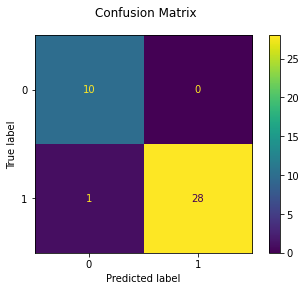

In [ ]:
#XGBoosting

from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Our model
XG_clf = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=700, 
                       random_state=100)

# fit model no training data
XG_clf.fit(X_train, y_train)

# make predictions for test data
y_pred = XG_clf.predict(X_test)

predicted = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("-----------------------------------------------------------------------")
# comparing actual response values (y_test) with predicted response values (predicted)
print("Classification report : \n", XG_clf,"\n",
      metrics.classification_report(y_test, predicted))
disp = metrics.plot_confusion_matrix(XG_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

print("Confusion matrix: \n", disp.confusion_matrix)


In [ ]:
#input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(X_test[1])

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
#std_data = scaler.transform(input_data_reshaped)

prediction = XG_clf.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[1]
The Person has Parkinsons
